## Read in the appropriate packages 

In [2]:
#!pip install pmdarima

In [92]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime 
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series 

from statsmodels.tsa.stattools import adfuller # Augmented Dickey Fuller test for testing stationarity

from statsmodels.tsa.arima.model import ARIMA #for manual ARIMA

import pmdarima as pm #auto arima


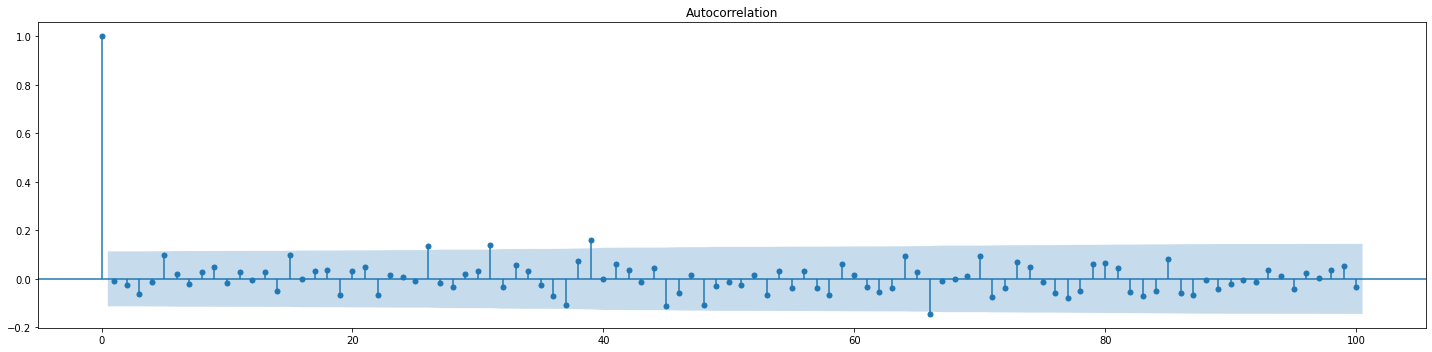

In [64]:
# autocorrelation plot - correlation between lagged variables - see excel sheet 
#check if the data is stationary

# autocorrelation plot of the dataset
fig = plot_acf(series, lags=100)
fig.set_size_inches((20, 5))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## 1. Read in the monthly anti-diabetic drug sales in Australia dataset

Download the data from the the gdrive: https://drive.google.com/file/d/1LtTyAaWTCWYwjWG9OdSo_gUoRg5579Mk/view?usp=sharing

In [4]:
# Downloading SINGLE stock using pandas_datareader

drug_sales_df = pd.read_csv('./drug_sales_australia.csv',
                          parse_dates=['date'],
                         index_col=['date'])
drug_sales_df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


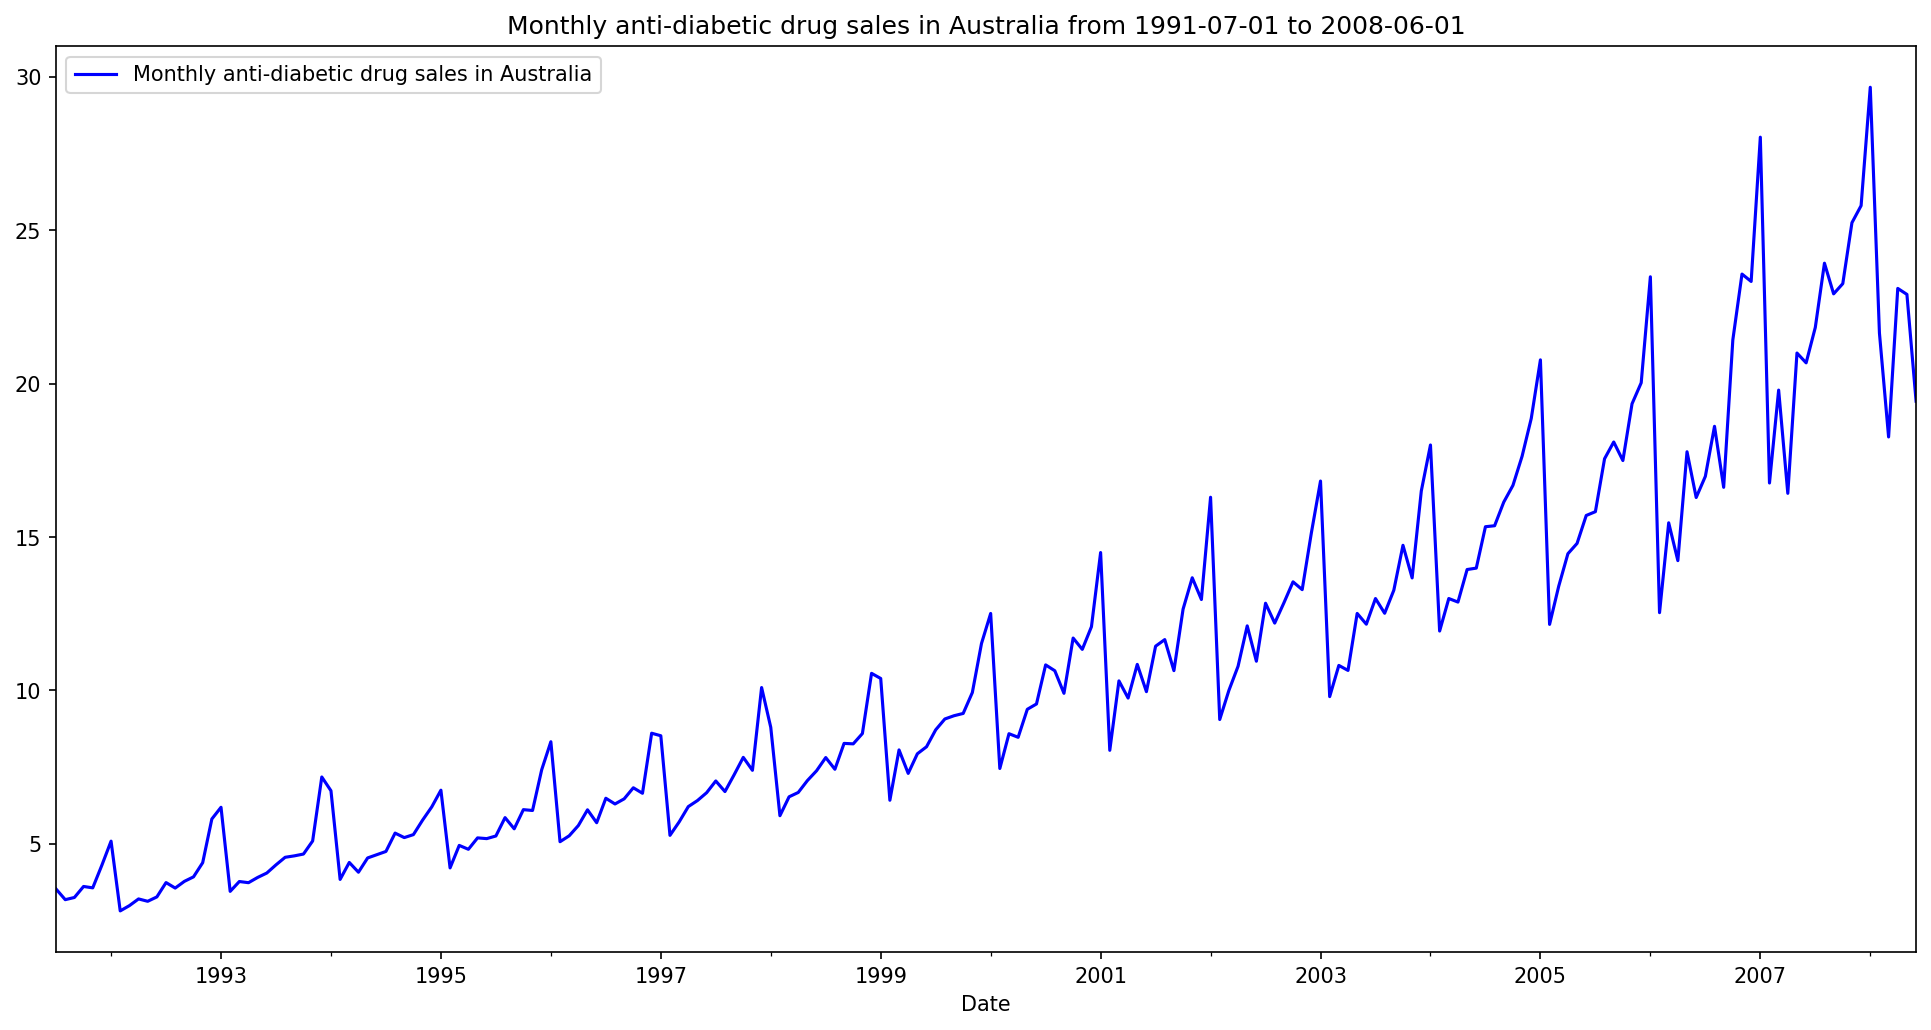

In [5]:
# Visualizing the series
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150) #dpi = resolution. default 100.
  
# in plot method we set the label and color of the curve.
drug_sales_df['value'].plot(label='Monthly anti-diabetic drug sales in Australia', color='blue')
  
# adding title to the plot
plt.title('Monthly anti-diabetic drug sales in Australia from {} to {}'.format('1991-07-01', '2008-06-01'))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


In [6]:
#questions
#1. trend or seasonality?
#2. additive or multiplicative trend and seasonality?


In [7]:
drug_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


## 2. Exploratory Data Analysis (EDA)


In [8]:
# 1. Descriptive Statistics
drug_sales_df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


<AxesSubplot:>

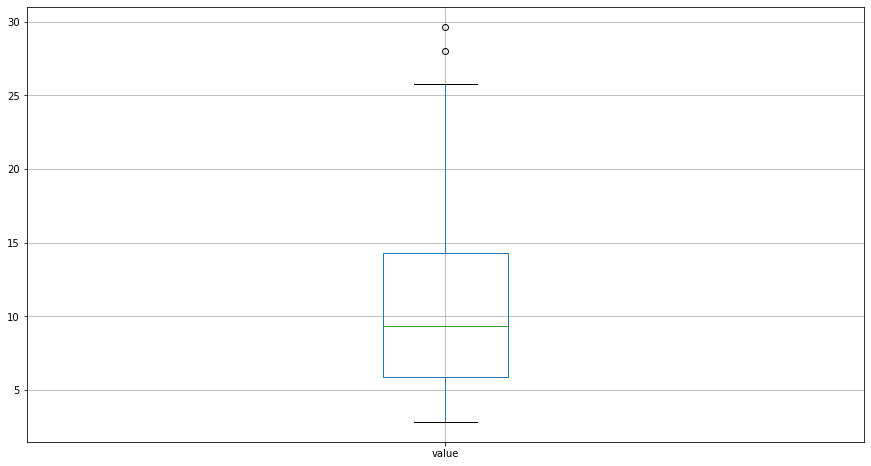

In [9]:
plt.figure(figsize=(15,8))
drug_sales_df.boxplot()

In [10]:
# 2. Check for missing values
drug_sales_df.isnull().sum()

value    0
dtype: int64

In [11]:
# 3. Find the indexes that are missing
pd.date_range(start = drug_sales_df.index.min(), end = drug_sales_df.index.max(), freq='MS').difference(drug_sales_df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='MS')

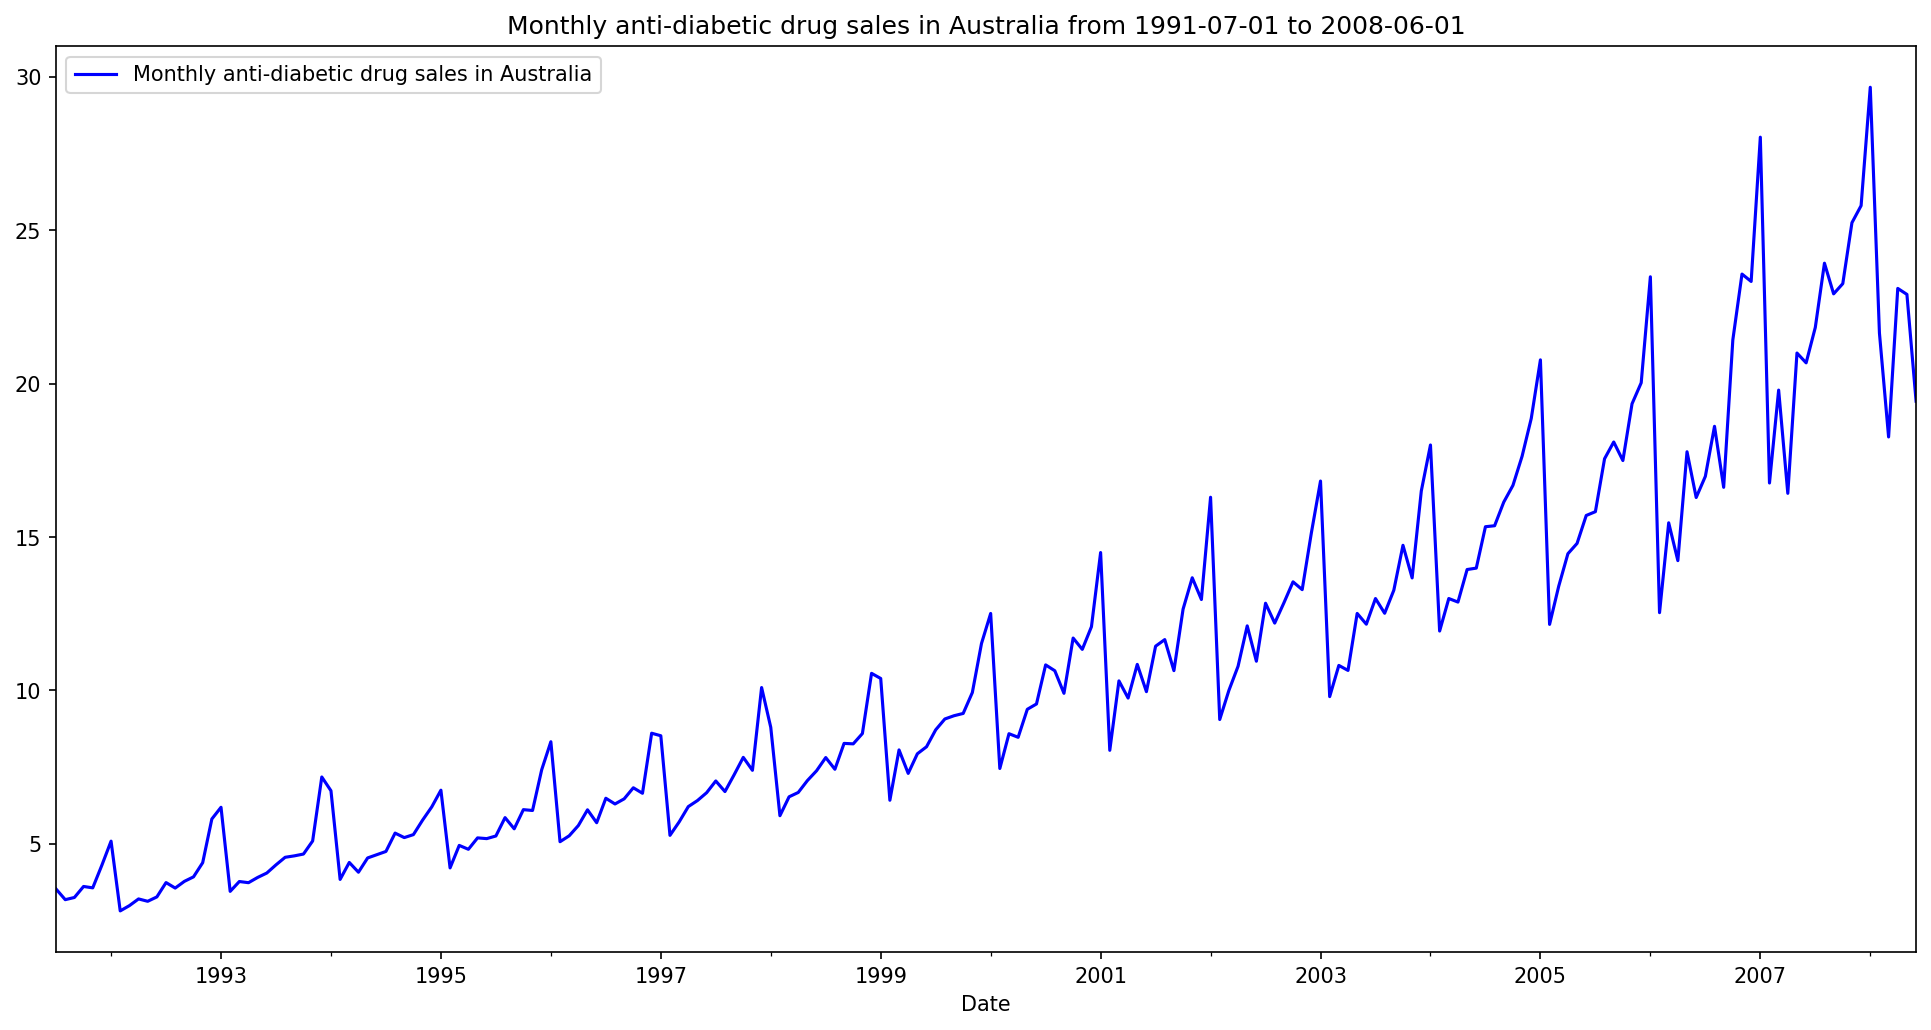

In [12]:
# Visualizing the series
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150) #dpi = resolution. default 100.
  
# in plot method we set the label and color of the curve.
drug_sales_df['value'].plot(label='Monthly anti-diabetic drug sales in Australia', color='blue')
  
# adding title to the plot
plt.title('Monthly anti-diabetic drug sales in Australia from {} to {}'.format('1991-07-01', '2008-06-01'))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


## Stationarity  

### Why Does Stationarity Matter in Time Series Analysis? Why do we have to make sure our data set is stationary before we can run different ARIMA models on it? 


1. Consider the forecasting problem. How do you forecast? If everything's different tomorrow then it's impossible to forecast, because everything's going to be different. So the key to forecasting is to find something that will be the same tomorrow, and extend that to tomorrow. Hence, a stationarized series is relatively easy to predict. 

2. Statistical modeling methods assume or require the time series to be stationary to be effective. The ARIMA models predict that the mean and variance will be the same in the future as they have been in the past. A stationary time series will also allow us to obtain meaningful statistics such as means, variances, and correlations with other variables. These stats are only useful descriptors if the series is stationary.

3. As in the case of the monthly anti-diabetic drug sales, the series is consistently increasing over time. Hence, the sample mean and variance will grow with the size of the sample and the models will always underestimate the mean and variance in the future periods. 

Ssource: https://towardsdatascience.com/why-does-stationarity-matter-in-time-series-analysis-e2fb7be74454

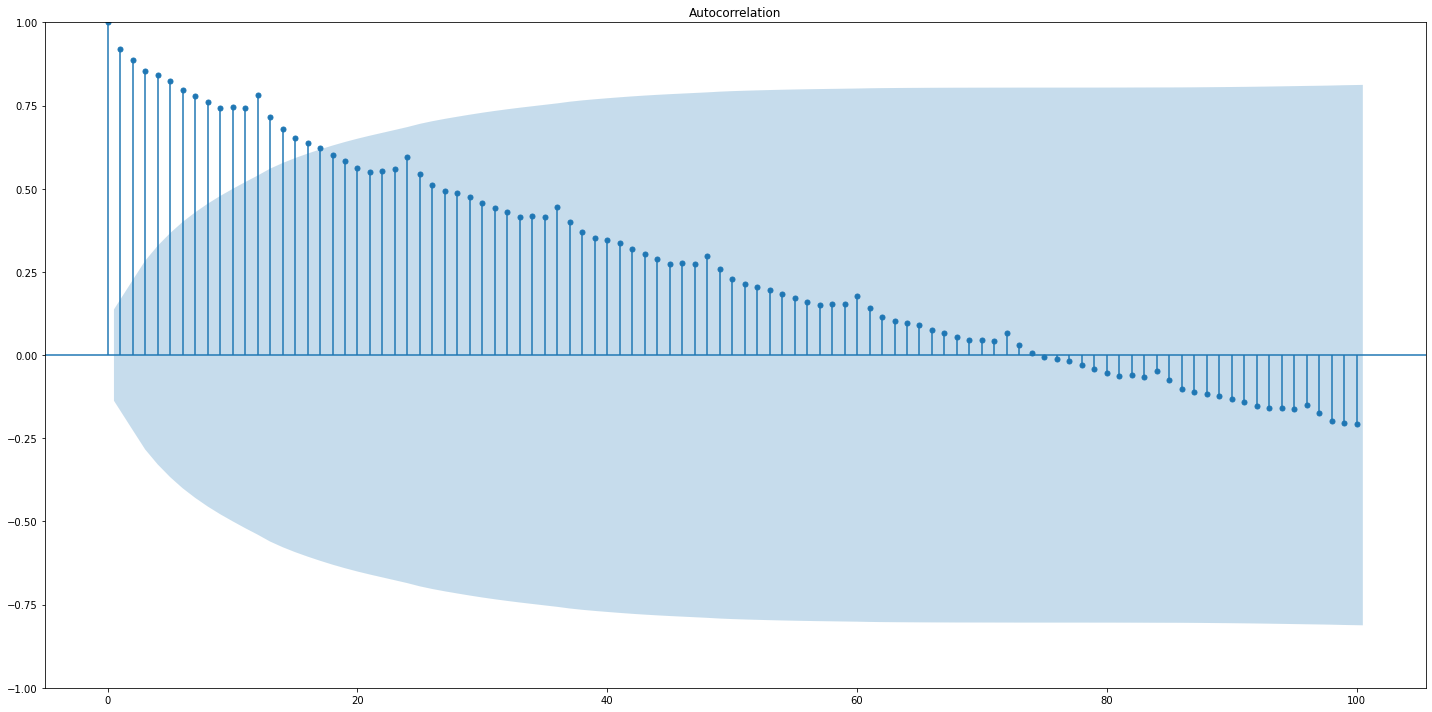

In [13]:
#check if the data is stationary

# autocorrelation plot of the dataset
fig = plot_acf(drug_sales_df, lags=100)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [14]:
#data has trend as well as seasonlity of 12 months

## Unit Root Test - Augmented Dickey-Fuller (ADF) test to check stationarity 

In [15]:
X = drug_sales_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.145186
p-value: 1.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Running the test prints the test statistic value of 3.14. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of 3.14 is greater than the value of -2.87 at 5%. Also, the p-value is greater than 0.05.

This suggests that we fail to reject the null hypothesis with a significance level of 5%. Failing to reject the null hypothesis means that the process a unit root, and in turn that the time series is non-stationary.

## Differencing 

One of the best ways to make a non-stationary time series stationary — compute the differences between consecutive observations. This is known as differencing.

Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

<AxesSubplot:xlabel='date'>

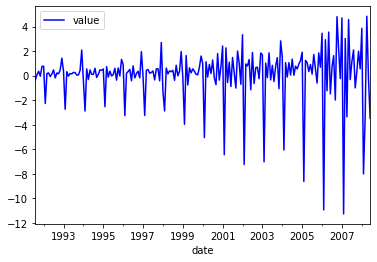

In [16]:
#create differenced dataset
first_diff_df = drug_sales_df.diff().dropna()
first_diff_df.plot(color='blue')

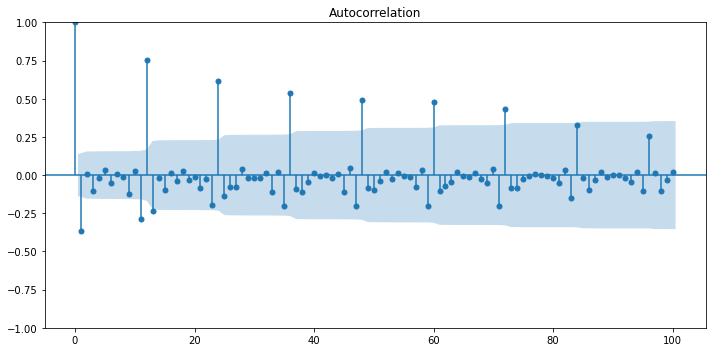

In [17]:
# autocorrelation plot of differenced dataset
fig = plot_acf(first_diff_df, lags=100)
fig.set_size_inches((10, 5))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [18]:
X = first_diff_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.495172
p-value: 0.116653
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


From the ACF and line plot and the ADF test p-value we can deduce that the series is non-stationary. As we can see a seasonal pattern, let us apply seasonal differencing. 

<AxesSubplot:xlabel='date'>

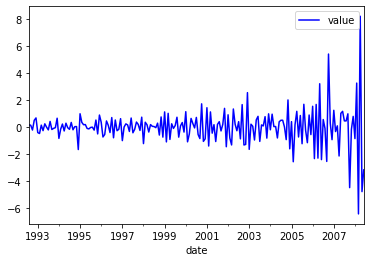

In [19]:
seasonal_diff_df = first_diff_df.diff(12).dropna()
seasonal_diff_df.plot(color = 'blue')

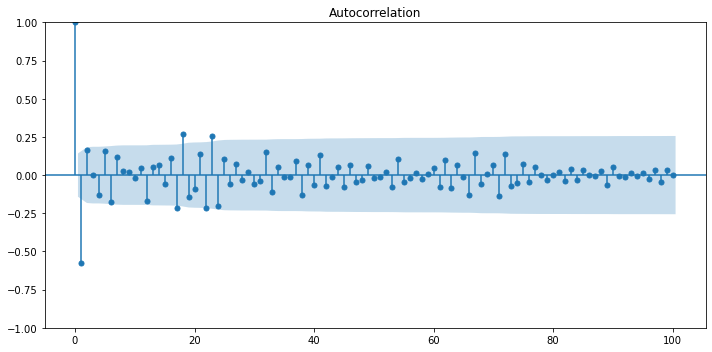

In [20]:
# autocorrelation plot of the seasonaly differenced dataset
fig = plot_acf(seasonal_diff_df, lags=100)
fig.set_size_inches((10, 5))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [21]:
X = seasonal_diff_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.783440
p-value: 0.000058
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


Since p-value is less than 0.05 we can reject the null hypothesis and the data is stationary.

## Seasonal differencing and interpretation of differencing

When both seasonal and first differences are applied -
1. it makes no difference which is done first—the result will be the same.
2. If seasonality is strong, it is recommended that seasonal differencing be done first because sometimes the resulting series will be stationary and there will be no need for further first difference.

Also, it is important that if differencing is used, the differences are interpretable.
1. first differences are the change between one observation and the next.
2. seasonal differences are the change between one year to the next.

But taking lag 3 differences for yearly data, for example, results in a model which cannot be sensibly interpreted.


## BEGIN HW2 - Test/Train splits

In [22]:
drug_sales_df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [57]:
# split 1
mask1 = (drug_sales_df.index >= '2004-07-01') & (drug_sales_df.index<= '2005-06-01')
test_data1 = drug_sales_df[mask1]
train_data1 = drug_sales_df[~mask1]

# split 2
mask2 = (drug_sales_df.index >= '2005-07-01') & (drug_sales_df.index<= '2006-06-01')
test_data2 = drug_sales_df[mask2]
train_data2 = drug_sales_df[~mask2]

# split 3
mask3 = (drug_sales_df.index >= '2006-07-01') & (drug_sales_df.index<= '2007-06-01')
test_data3 = drug_sales_df[mask3]
train_data3 = drug_sales_df[~mask3]

# split 4
mask4 = (drug_sales_df.index >= '2007-07-01') & (drug_sales_df.index<= '2008-06-01')
test_data4 = drug_sales_df[mask4]
train_data4 = drug_sales_df[~mask4]
# from sklearn.model_selection import train_test_split

# train_data, test_data = train_test_split(drug_sales_df, test_size=12, random_state=25, shuffle = False)
# #shuffle = False is very important to ensure the order of the data

# print(f"No. of training examples: {train_data.shape[0]}")
# print(f"No. of testing examples: {test_data.shape[0]}")

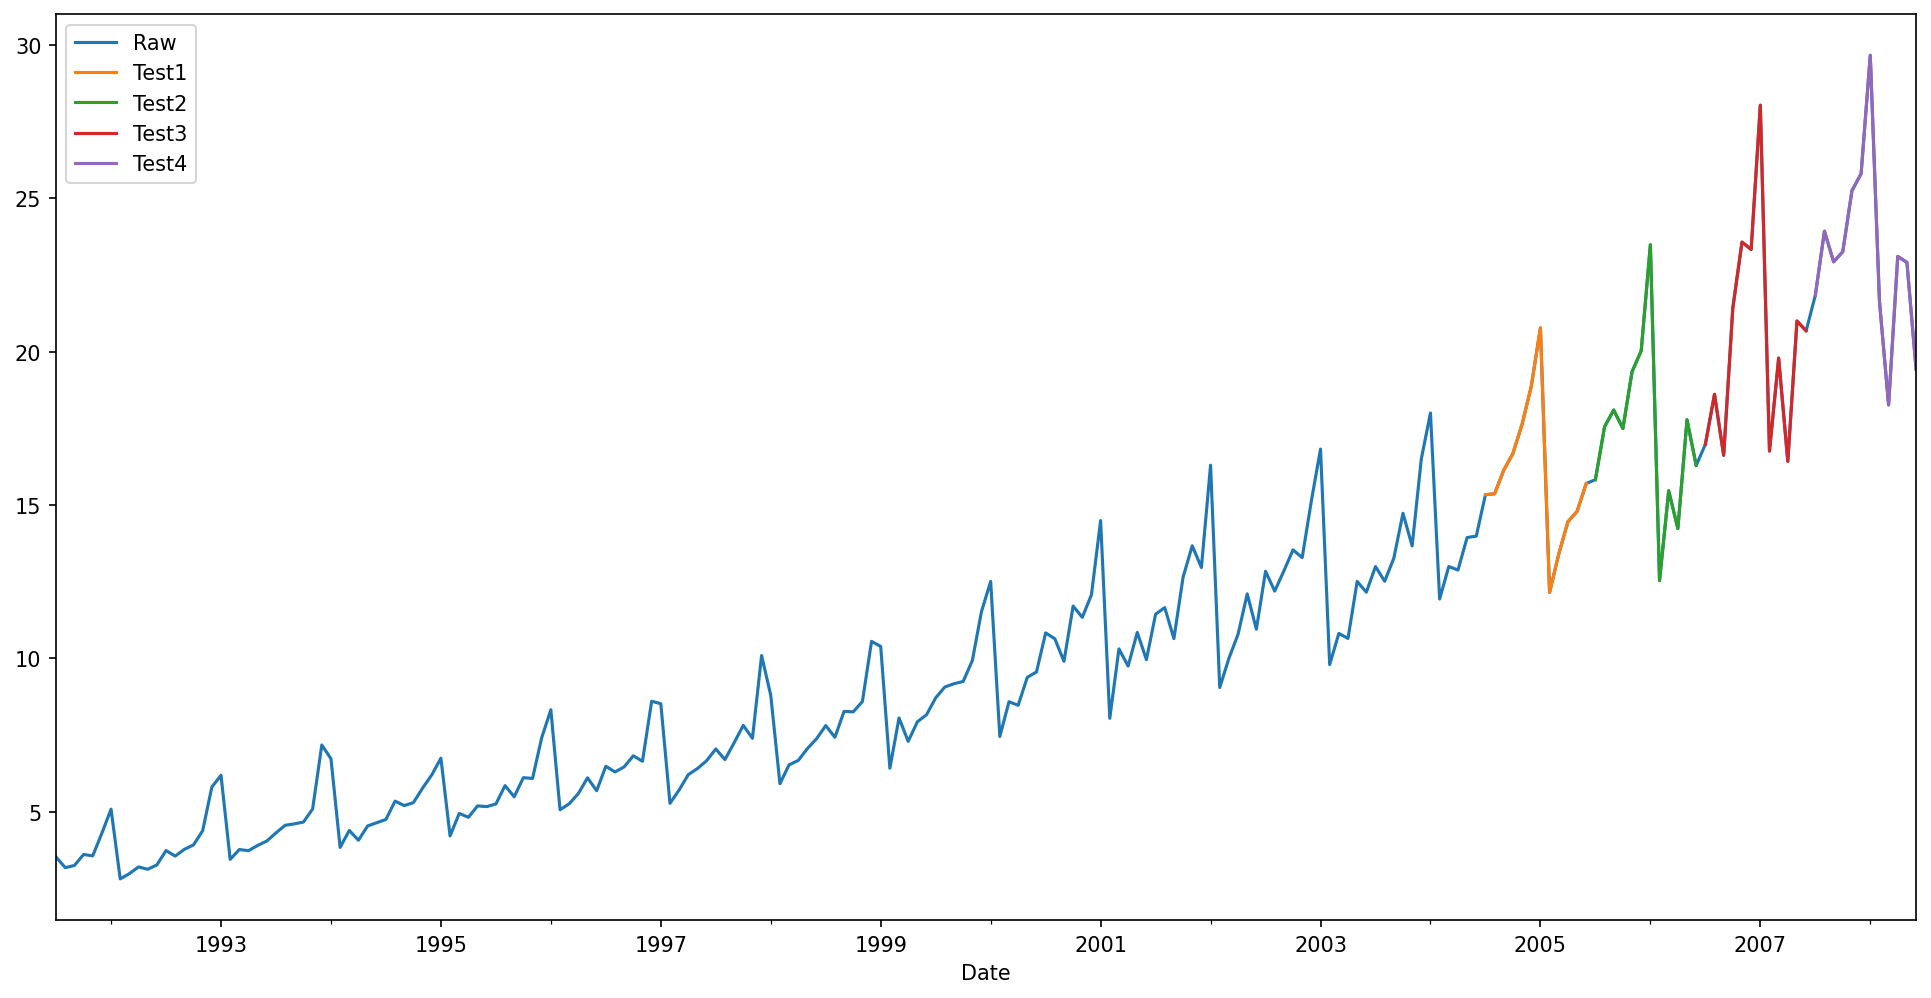

In [58]:
#Plot train and test data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
drug_sales_df['value'].plot(label='Raw')
test_data1['value'].plot(label='Test1')
test_data2['value'].plot(label='Test2')
test_data3['value'].plot(label='Test3')
test_data4['value'].plot(label='Test4')
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


## Fitting Models - AR, MA, non-seasonal, and seasonal ARIMA Models

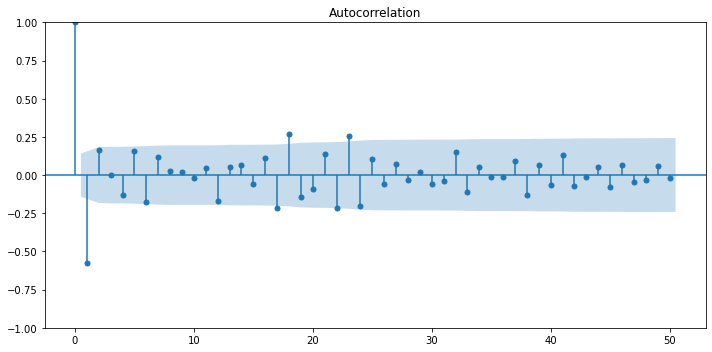

In [63]:
# autocorrelation plot of the seasonaly differenced dataset
fig = plot_acf(seasonal_diff_df, lags=50)
fig.set_size_inches((10, 5))
# Tight layout to realign things
fig.tight_layout()
plt.show()

/Users/dulam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


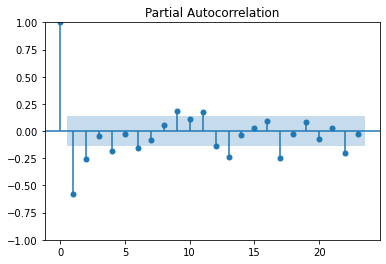

In [64]:
#plot PACF of the differenced time series.
plot_pacf(seasonal_diff_df)
plt.show()

### Use auto-arima w/ seasonality to find best model parameters

Going to use auto-arima on one training set to determine the model parameters to use on the other training sets

In [65]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train_data1, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=522.286, Time=1.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=627.265, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=584.503, Time=0.91 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=607.928, Time=0.85 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=742.806, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=550.262, Time=0.11 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=523.732, Time=20.54 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=527.308, Time=1.44 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=517.123, Time=29.14 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=518.129, Time=34.86 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=525.611, Time=26.29 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=611.137, Time=13.45 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=23.08 sec
 ARIMA(2,0,1)(1,1,2)[12] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  192
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -248.702
Date:                                 Thu, 09 Feb 2023   AIC                            511.403
Time:                                         11:01:41   BIC                            533.754
Sample:                                              0   HQIC                           520.466
                                                 - 192                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6956      0.070      9.921      0.000       0.558       0.833
ar.L2          0.2938      0.066      4.451      0.000       0.164       0.423
ma.L1         -0.5813      0.074     -7.900      0.000      -0.726      -0.437
ar.S.L12       0.7663      0.176      4.349      0.000       0.421       1.112
ma.S.L12      -1.5263      0.199     -7.682      0.000      -1.916      -1.137
ma.S.L24       0.7710      0.123      6.292      0.000       0.531       1.011
sigma2         0.8291      0.081     10.229      0.000       0.670       0.988
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               167.41
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              17.95   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
smodel.order
smodel.seasonal_order

(1, 1, 2, 12)

In [95]:
# function to split data based on year range
def train_test_split(year_start,year_end):
    mask = (drug_sales_df.index >= (year_start +'-07-01')) & (drug_sales_df.index<= (year_end + '-06-01'))
    test_data = drug_sales_df[mask]
    train_data = drug_sales_df[drug_sales_df.index< (year_start +'-07-01')]
    return train_data, test_data


In [172]:
# function to fit arima models
# uses the seasonal model's order hyper parameters
def arima_fit(train_data, order, seasonal_order=()):
    if (seasonal_order==()):
        arima_model = ARIMA(train_data, order=order)
    else:
        arima_model = ARIMA(train_data, order=order, seasonal_order=seasonal_order)
    arima_model_fit = arima_model.fit()
    return arima_model_fit

In [189]:
# model metrics func
def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    df = pd.DataFrame({'Model': model,
                       'RMSE': rmse,
                       'MAE': mae, 
                       'MAPE': mape}, index=[0])

    return df

In [210]:
master_metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])

def forecast_and_plot(arima_fits, title):
    # init metrics df
    metrics_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])

    # Create plots of arima forecast
    fig, axs = plt.subplots(len(arima_fits), figsize = (15,15))
    for i in range(0,len(arima_fits)):
        # forecast
        fit = arima_fits[i]
        forecast = fit.get_forecast(12,alpha=0.05)
        fc = forecast.predicted_mean
        conf = forecast.conf_int()
        # plot
        year_start = str(2004 +i)
        year_end = str(2005 +i)
        train_data, test_data = train_test_split(year_start, year_end)
        fc_series = pd.Series(fc, index=test_data.index)
        lower_series = pd.Series(conf["lower value"], index=test_data.index)
        upper_series = pd.Series(conf["upper value"], index=test_data.index)
        axs[i].plot(train_data, label='training')
        axs[i].plot(test_data, label='test ' + year_start + ' - ' + year_end)
        axs[i].plot(fc_series, label='forecast ' + year_start + ' - ' + year_end)
        axs[i].fill_between(lower_series.index, lower_series, upper_series, 
                        color='k', alpha=.15)
        axs[i].set_title('Forecast July ' + year_start + ' - June ' + year_end + ' vs Actuals')
        axs[i].legend(loc='upper left', fontsize=8)
        #metrics
        df = metrics_cal(test_data.values.flatten(), 
                                    fc_series.values.flatten(), 
                                    'July ' + year_start + ' - June ' + year_end + ' ' + title)
        metrics_df = metrics_df.append(df)
    return metrics_df


In [ ]:
# arima fits non seasonal
arima_fits = []
for i in range(0,4):
    year_start = str(2004 +i)
    year_end = str(2005 +i)
    train_data, test_data = train_test_split(year_start, year_end)
    arima_model_fit = arima_fit(train_data,(0,2,1))
    arima_fits.append(arima_model_fit)

,Model,RMSE,MAE,MAPE
0,July 2004 - June 2005 ARIMA Non-Seasonal,2.764351,2.145801,12.669585
0,July 2005 - June 2006 ARIMA Non-Seasonal,3.028354,2.356663,13.171156
0,July 2007 - June 2008 ARIMA Non-Seasonal,3.499998,2.831386,11.749425
0,July 2006 - June 2007 ARIMA Non-Seasonal,4.859299,3.629125,15.905180


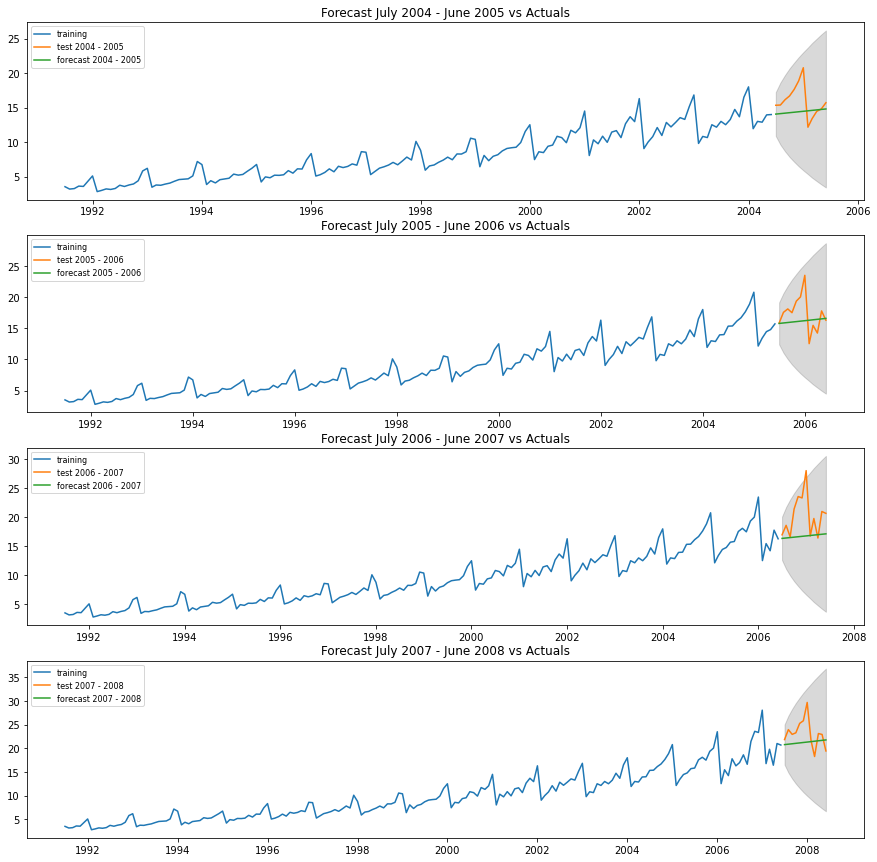

In [215]:
# forecast and plot seasonal arima
metrics_df = forecast_and_plot(arima_fits, "ARIMA Non-Seasonal")

# append master metrics 
master_metrics_dataframe = master_metrics_dataframe.append(metrics_df)

# View Accuracy Metrics
metrics_df.sort_values(by='MAE')

In [ ]:
# arima fits based on seasonal order of training data up to 2004
arima_fits = []
for i in range(0,4):
    year_start = str(2004 +i)
    year_end = str(2005 +i)
    train_data, test_data = train_test_split(year_start, year_end)
    arima_model_fit = arima_fit(train_data,smodel.order,smodel.seasonal_order)
    arima_fits.append(arima_model_fit)

,Model,RMSE,MAE,MAPE
0,July 2005 - June 2006 ARIMA Seasonal,1.065193,0.950955,5.645834
0,July 2004 - June 2005 ARIMA Seasonal,1.090400,0.958339,5.965734
0,July 2007 - June 2008 ARIMA Seasonal,2.196436,1.849384,8.563216
0,July 2006 - June 2007 ARIMA Seasonal,2.448125,2.187137,10.567297


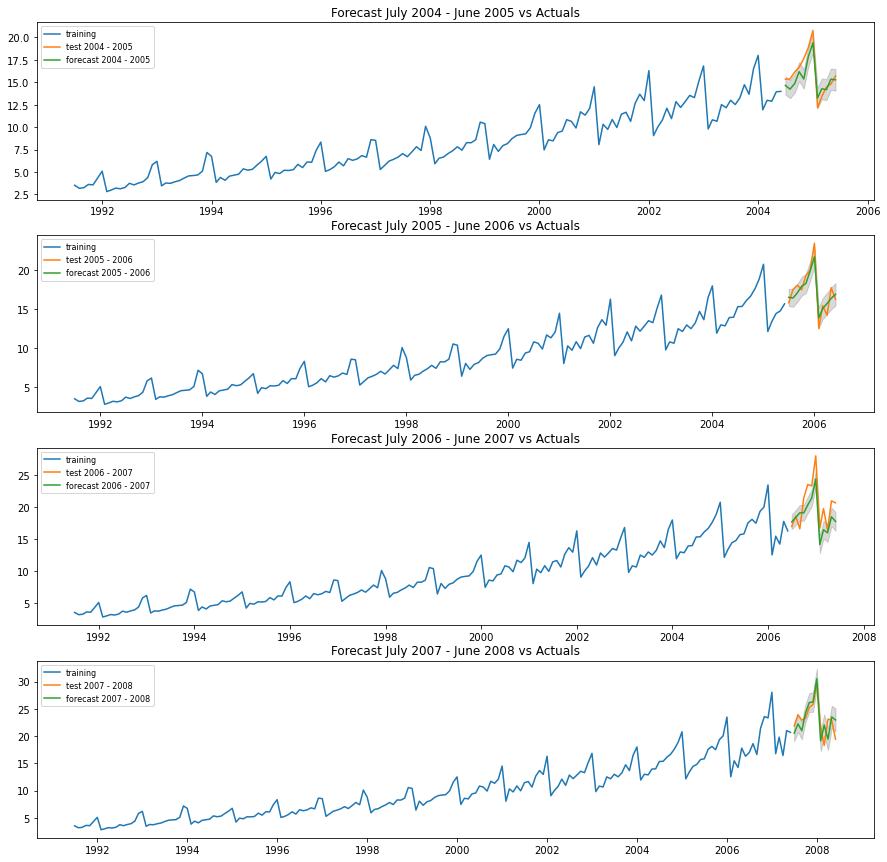

In [217]:
# forecast and plot seasonal arima
metrics_df = forecast_and_plot(arima_fits, "ARIMA Seasonal")

# append master metrics 
master_metrics_dataframe = master_metrics_dataframe.append(metrics_df)

# View Accuracy Metrics
metrics_df.sort_values(by='MAE')

In [218]:
# View Master Accuracy Metrics
master_metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE
0,July 2005 - June 2006 ARIMA Seasonal,1.065193,0.950955,5.645834
0,July 2004 - June 2005 ARIMA Seasonal,1.090400,0.958339,5.965734
0,July 2007 - June 2008 ARIMA Seasonal,2.196436,1.849384,8.563216
0,July 2004 - June 2005 ARIMA Non-Seasonal,2.764351,2.145801,12.669585
0,July 2004 - June 2005 ARIMA Non-Seasonal,2.764351,2.145801,12.669585
0,July 2004 - June 2005 ARIMA Non-Seasonal,2.764351,2.145801,12.669585
0,July 2006 - June 2007 ARIMA Seasonal,2.448125,2.187137,10.567297
0,July 2005 - June 2006 ARIMA Non-Seasonal,3.028354,2.356663,13.171156
0,July 2005 - June 2006 ARIMA Non-Seasonal,3.028354,2.356663,13.171156
0,July 2005 - June 2006 ARIMA Non-Seasonal,3.028354,2.356663,13.171156


It appears that forecasting the earlier years was easier considering the exponential multiplicity of the dataset isn't in effect as much. Also, the seasonal order was based on the training set leading up to 2004.

In [ ]:
# Repeat with ETS


In [33]:
# manual arima forecast

# Forecast
#fc, se, conf = manual_model_fit.predict(12, alpha=0.05)  # 95% conf
forecast = manual_model_fit.get_forecast(12, alpha=0.05)  # 95% conf
fc = forecast.predicted_mean
conf = forecast.conf_int()
conf

,lower value,upper value
2007-07-01,16.546606,24.995032
2007-08-01,14.871157,26.850115
2007-09-01,13.595887,28.305019
2007-10-01,12.526085,29.554455
2007-11-01,11.586558,30.673616
2007-12-01,10.738851,31.700957
2008-01-01,9.960188,32.659254
2008-02-01,9.235770,33.563305
2008-03-01,8.555350,34.423360
2008-04-01,7.911485,35.246858


In [34]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf["lower value"], index=test_data.index)
upper_series = pd.Series(conf["upper value"], index=test_data.index)


In [35]:
fc_series

date
2007-07-01    20.770819
2007-08-01    20.860636
2007-09-01    20.950453
2007-10-01    21.040270
2007-11-01    21.130087
2007-12-01    21.219904
2008-01-01    21.309721
2008-02-01    21.399538
2008-03-01    21.489355
2008-04-01    21.579172
2008-05-01    21.668989
2008-06-01    21.758806
Name: predicted_mean, dtype: float64

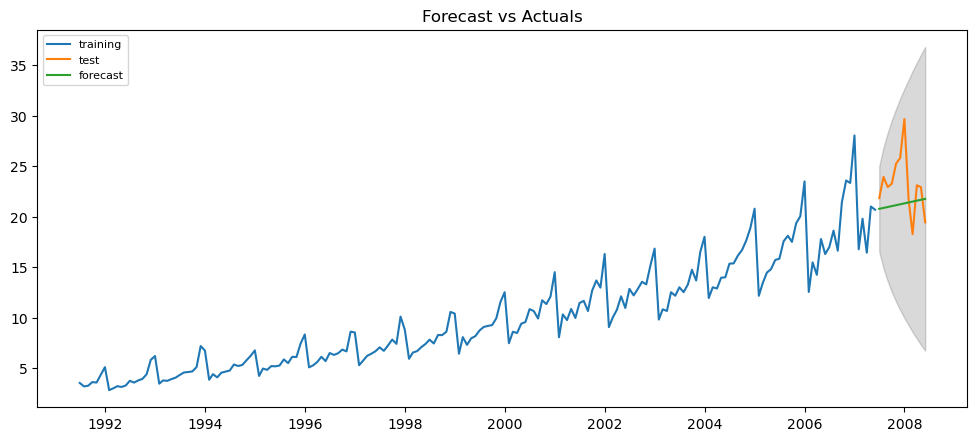

In [36]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='test')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Auto ARIMA - Non seasonal

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [37]:
non_seasonal_auto_model = pm.auto_arima(train_data, start_p=0, start_q=0, 
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=12,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

print(non_seasonal_auto_model.summary())

/Users/dulam/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1473.879, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=844.283, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1279.130, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=802.660, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=794.855, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=795.190, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=799.333, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=797.769, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=785.896, Time=0.18 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=792.088, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=788.158, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=788.800, Time=0.22 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total 

In [38]:

# Forecast
n_periods = 12
fc_auto_nonseasonal, confint = non_seasonal_auto_model.predict(n_periods=n_periods, return_conf_int=True)

In [39]:
fc_auto_nonseasonal

2007-07-01    21.107271
2007-08-01    19.519571
2007-09-01    20.670802
2007-10-01    19.354484
2007-11-01    20.595198
2007-12-01    19.320076
2008-01-01    20.566954
2008-02-01    19.302806
2008-03-01    20.544948
2008-04-01    19.287785
2008-05-01    20.523790
2008-06-01    19.273058
Freq: MS, dtype: float64

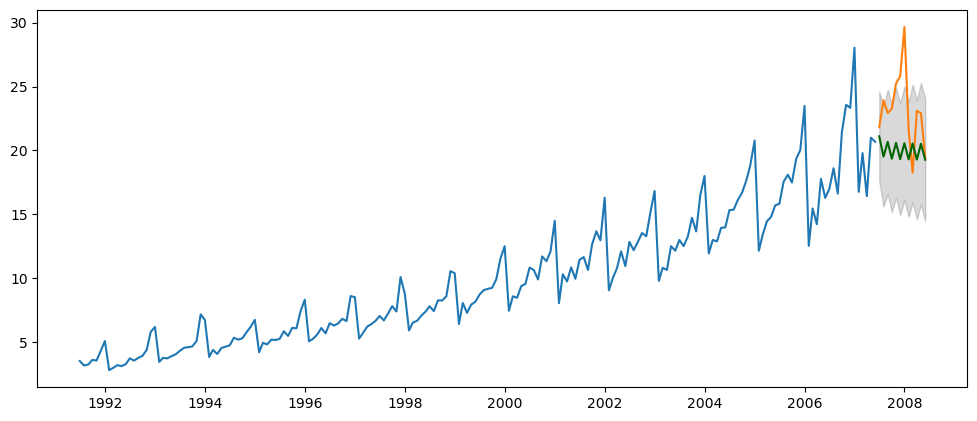

In [40]:
# make series for plotting purpose
fc_series_auto_nonseasonal = pd.Series(fc_auto_nonseasonal, index=test_data.index)
lower_series = pd.Series(confint[:, 0], index=test_data.index)
upper_series = pd.Series(confint[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='train')
plt.plot(test_data, label='test')
plt.plot(fc_series_auto_nonseasonal, color='darkgreen', label='forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.show()

## Auto ARIMA Seasonal 

In [ ]:
# Forecast
n_periods = 12
fc_auto_seasonal, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)

In [ ]:
fc_auto_seasonal

2007-07-01    20.320105
2007-08-01    22.168178
2007-09-01    20.120640
2007-10-01    24.361874
2007-11-01    26.281995
2007-12-01    26.089797
2008-01-01    30.348269
2008-02-01    19.278657
2008-03-01    22.158996
2008-04-01    19.444934
2008-05-01    23.176590
2008-06-01    23.319034
Freq: MS, dtype: float64

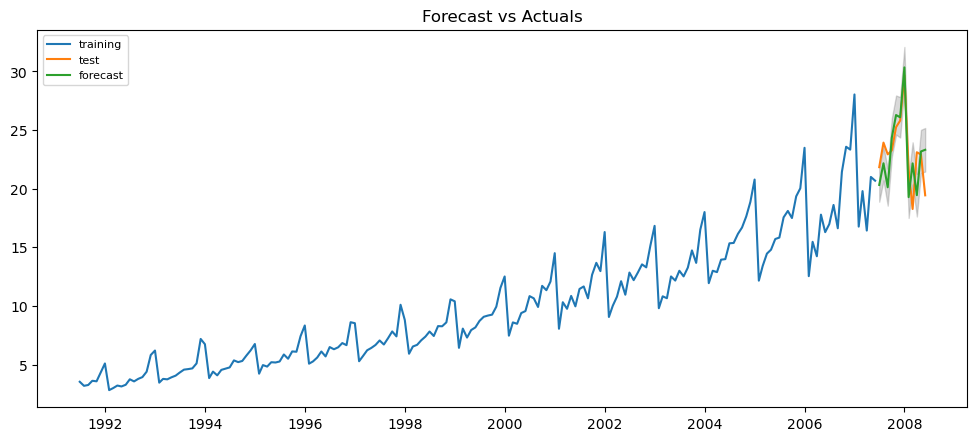

In [ ]:
# make series for plotting purpose
fc_series_auto_seasonal = pd.Series(fc_auto_seasonal, index=test_data.index)
lower_series = pd.Series(confint[:, 0], index=test_data.index)
upper_series = pd.Series(confint[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='test')
plt.plot(fc_series_auto_seasonal, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Model Evaluation

In [ ]:
#define metrics dataframe which will be used below for 
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])

                                 
def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    
    df = pd.DataFrame({'Model': model,
                       'RMSE': rmse,
                       'MAE': mae, 
                       'MAPE': mape}, index=[0])
    dataframe = metrics_dataframe.append(df)
    return dataframe

In [ ]:
fc_series

date
2007-07-01    20.770819
2007-08-01    20.860636
2007-09-01    20.950453
2007-10-01    21.040270
2007-11-01    21.130087
2007-12-01    21.219904
2008-01-01    21.309721
2008-02-01    21.399538
2008-03-01    21.489355
2008-04-01    21.579172
2008-05-01    21.668989
2008-06-01    21.758806
Name: predicted_mean, dtype: float64

In [ ]:
#get all the metrics
metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                fc_series.values.flatten(), 
                                'Manual ARIMA')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                fc_series_auto_nonseasonal.values.flatten(), 
                                'Auto ARIMA Non Seasonal')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                fc_series_auto_seasonal.values.flatten(), 
                                'Auto ARIMA Seasonal')



In [ ]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE
0,Auto ARIMA Seasonal,2.336595,1.938953,9.005265
0,Manual ARIMA,3.499998,2.831386,11.749425
0,Auto ARIMA Non Seasonal,4.261604,3.545391,14.481163


In [ ]:
# Create a data frame with all the predictions along with the test data
test_pred_df = test_data.copy()

# Add all predictions 
test_pred_df = test_pred_df.assign(manual_arima_pred = fc_series.values.flatten(),
                                   auto_nonseasonal_pred = fc_series_auto_nonseasonal.values.flatten(),
                                   auto_seasonal_pred = fc_series_auto_seasonal.values.flatten(),
                                   avg_pred = (fc_series.values.flatten()+
                                               fc_series_auto_nonseasonal.values.flatten()+
                                               fc_series_auto_seasonal.values.flatten())/3)

test_pred_df

,value,manual_arima_pred,auto_nonseasonal_pred,auto_seasonal_pred,avg_pred
date,,,,,
2007-07-01,21.834890,20.770819,21.107271,20.320105,20.732732
2007-08-01,23.930204,20.860636,19.519571,22.168178,20.849462
2007-09-01,22.930357,20.950453,20.670802,20.120640,20.580632
2007-10-01,23.263340,21.040270,19.354484,24.361874,21.585543
2007-11-01,25.250030,21.130087,20.595198,26.281995,22.669094
2007-12-01,25.806090,21.219904,19.320076,26.089797,22.209925
2008-01-01,29.665356,21.309721,20.566954,30.348269,24.074981
2008-02-01,21.654285,21.399538,19.302806,19.278657,19.993667
2008-03-01,18.264945,21.489355,20.544948,22.158996,21.397766


In [ ]:
metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                test_pred_df['avg_pred'], 
                                'Average')


In [ ]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE
0,Auto ARIMA Seasonal,2.336595,1.938953,9.005265
0,Average,2.840444,2.576361,10.957520
0,Manual ARIMA,3.499998,2.831386,11.749425
0,Auto ARIMA Non Seasonal,4.261604,3.545391,14.481163


## Time Series Cross Validation - see slides

Sources: 

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

https://towardsdatascience.com/dont-use-k-fold-validation-for-time-series-forecasting-30b724aaea64